<a href="https://colab.research.google.com/github/lituldust/Machine-Learning-Study/blob/main/Gym_Reinforcement_Learning_(Q_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 2000
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

RENDER = False

epsilon = 0.9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break

print(Q)
print(f"Average rewards: {sum(rewards)/len(rewards)}:")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[[6.57672874e-03 5.52007937e-01 6.44127980e-03 6.52031379e-03]
 [4.91358040e-03 1.60277881e-03 1.25160593e-03 3.55144138e-01]
 [4.69001277e-03 2.61399147e-03 4.77237124e-03 1.28513708e-01]
 [2.34363087e-03 3.39122334e-03 1.68308222e-03 4.04458821e-02]
 [7.40272471e-01 1.39445822e-03 5.59232075e-03 3.97548235e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.40978963e-06 2.50439124e-05 1.27761433e-02 1.06285605e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.87411953e-03 1.08893202e-03 4.43560552e-03 5.99320482e-01]
 [1.26072102e-03 4.20058350e-01 3.59090675e-03 1.45625287e-03]
 [1.78961120e-01 1.15141491e-03 2.30138033e-03 3.05615469e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.23054021e-02 6.82996011e-02 6.84640513e-01 2.99749802e-02]
 [4.58202993e-02 9.40835403e-01 1.04507474e-01 5.08385902e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


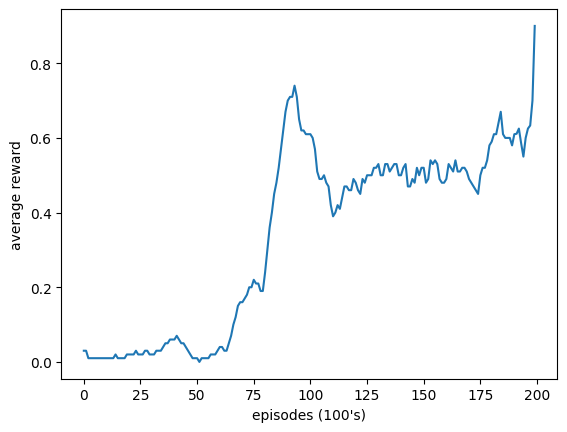

In [5]:
def get_average(values):
  return sum(values) / len(values)

avg_rewards = []
for i in range(0, len(rewards), 10):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.xlabel('episodes (100\'s)')
plt.ylabel('average reward')
plt.show()